In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler as ros 
from collections import Counter

In [6]:
data = pd.read_excel('left.xlsx')

In [7]:
data

19.105261  34.058773  0.279291   2.000000 
0      21.095237  35.057096   0.300713          2
1      23.210886  35.057096   0.300158          2
2      10.000000  15.000000   0.311891          2
3      10.000000  16.000000   0.283791          2
4      11.099020  17.029386   0.306420          2
...          ...        ...        ...        ...
12976  22.045361  33.000000   0.309023          2
12977  22.045361  34.000000   0.328683          2
12978  22.045361  34.014703   0.315068          2
12979  23.041595  34.014703   0.316993          2
12980  21.045361  32.000000   0.318285          2

[12981 rows x 4 columns]

In [8]:
data.columns = ["Dist1", "Dist2","Dist3" , "op"]

In [9]:
data

Dist1      Dist2     Dist3  op
0      21.095237  35.057096  0.300713   2
1      23.210886  35.057096  0.300158   2
2      10.000000  15.000000  0.311891   2
3      10.000000  16.000000  0.283791   2
4      11.099020  17.029386  0.306420   2
...          ...        ...       ...  ..
12976  22.045361  33.000000  0.309023   2
12977  22.045361  34.000000  0.328683   2
12978  22.045361  34.014703  0.315068   2
12979  23.041595  34.014703  0.316993   2
12980  21.045361  32.000000  0.318285   2

[12981 rows x 4 columns]

In [11]:
data.isnull().sum()

Dist1    0
Dist2    0
Dist3    0
op       0
dtype: int64

<AxesSubplot:>

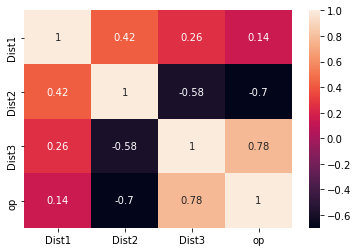

In [12]:
sns.heatmap(data.corr(), annot = True)

In [13]:
data["op"].value_counts()

2    11600
0     1200
1      181
Name: op, dtype: int64

In [14]:
X = data.iloc[:,0:3]
print(X.head)

<bound method NDFrame.head of            Dist1      Dist2     Dist3
0      21.095237  35.057096  0.300713
1      23.210886  35.057096  0.300158
2      10.000000  15.000000  0.311891
3      10.000000  16.000000  0.283791
4      11.099020  17.029386  0.306420
...          ...        ...       ...
12976  22.045361  33.000000  0.309023
12977  22.045361  34.000000  0.328683
12978  22.045361  34.014703  0.315068
12979  23.041595  34.014703  0.316993
12980  21.045361  32.000000  0.318285

[12981 rows x 3 columns]>


In [15]:
y = data.iloc[:,3]

In [17]:
ros =ros(random_state=42 )
X_res, y_res = ros.fit_resample(X, y)

In [18]:
print(Counter(data["op"]))
print(Counter(y_res))

Counter({2: 11600, 0: 1200, 1: 181})
Counter({2: 11600, 0: 11600, 1: 11600})


In [21]:
X_res

Dist1      Dist2     Dist3
0      21.095237  35.057096  0.300713
1      23.210886  35.057096  0.300158
2      10.000000  15.000000  0.311891
3      10.000000  16.000000  0.283791
4      11.099020  17.029386  0.306420
...          ...        ...       ...
34795  12.000000  36.055513  0.200186
34796  13.153830  42.296572  0.199007
34797  13.153830  42.296572  0.199007
34798  16.124515  34.000000  0.216137
34799  13.153830  36.013886  0.198698

[34800 rows x 3 columns]

In [23]:
y_res.tail()

34795    1
34796    1
34797    1
34798    1
34799    1
Name: op, dtype: int64

# converting data back for model training

In [24]:
dx = pd.DataFrame(X_res)
dy = pd.Series(y_res)

In [25]:
dx

Dist1      Dist2     Dist3
0      21.095237  35.057096  0.300713
1      23.210886  35.057096  0.300158
2      10.000000  15.000000  0.311891
3      10.000000  16.000000  0.283791
4      11.099020  17.029386  0.306420
...          ...        ...       ...
34795  12.000000  36.055513  0.200186
34796  13.153830  42.296572  0.199007
34797  13.153830  42.296572  0.199007
34798  16.124515  34.000000  0.216137
34799  13.153830  36.013886  0.198698

[34800 rows x 3 columns]

In [26]:
dy

0        2
1        2
2        2
3        2
4        2
        ..
34795    1
34796    1
34797    1
34798    1
34799    1
Name: op, Length: 34800, dtype: int64

# Standardising the Data

In [27]:
std = StandardScaler()
dx1= std.fit_transform(dx)
dx1 = pd.DataFrame(dx1)
print(dx1.head())

          0         1         2
0  1.348687  0.117957  0.961154
1  1.621296  0.117957  0.955493
2 -0.080976 -0.739328  1.075360
3 -0.080976 -0.696586  0.788278
4  0.060637 -0.652588  1.019467


# Model Training

In [29]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [30]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(dx1,dy,test_size =0.3,random_state = 42)

In [89]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
ypred = lr.predict(x_test)
print("Accuracy score - {} ".format(accuracy_score(y_test,ypred)))
print("Confusion matrix -\n {} ".format(confusion_matrix(y_test,ypred)))
print("Cllasification report - \n {} ".format(classification_report(y_test,ypred)))
print("Score(test) - {} ".format(lr.score(x_test,y_test)))
print("Score(train) - {} ".format(lr.score(x_train,y_train)))

Accuracy score - 0.9909003831417624 
Confusion matrix -
 [[3408   63    0]
 [   0 3525   17]
 [   0   15 3412]] 
Cllasification report - 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3471
           1       0.98      1.00      0.99      3542
           2       1.00      1.00      1.00      3427

    accuracy                           0.99     10440
   macro avg       0.99      0.99      0.99     10440
weighted avg       0.99      0.99      0.99     10440
 
Score(test) - 0.9909003831417624 
Score(train) - 0.9917077175697865 


# Saving Model using pickle

In [90]:
import pickle as pkl

In [92]:
pkl.dump(lr,open("left_eye_model",'wb'))
pkl.dump(std,open("left_eye_scaling_datamodel",'wb'))

# Testing if the model works 

In [47]:
lr = [12,23,0.656]

In [48]:
lr1= model1.transform([lr])
lr1

array([[ 0.17673178, -0.39739007,  4.59081458]])

In [49]:
ressult = model.predict([lr])

array([1], dtype=int64)

In [40]:
import pickle as pkl
model = pkl.load(open('left_eye_model','rb'))
model1 = pkl.load(open('left_eye_scaling_datamodel','rb'))

In [37]:
result = model.predict([x_test.iloc[1,:]])
print(result)

[1]


In [38]:
y_test.iloc[1]

1